In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/ExDiff'
import os
cwd = os.getcwd()
sep = os.sep

/content/drive/MyDrive/ExDiff


In [3]:
#@title Select Graph Model Type { display-mode: "form" }
model_type = "Stochastic Block Model" #@param ["Erdös-Rényi", "Stochastic Block Model", "Random Geometric"]

from IPython.display import display, HTML

# Hide the code
display(HTML('''
<script>
var cell = document.querySelector('.input');
if (cell) cell.style.display = 'none';
</script>
'''))


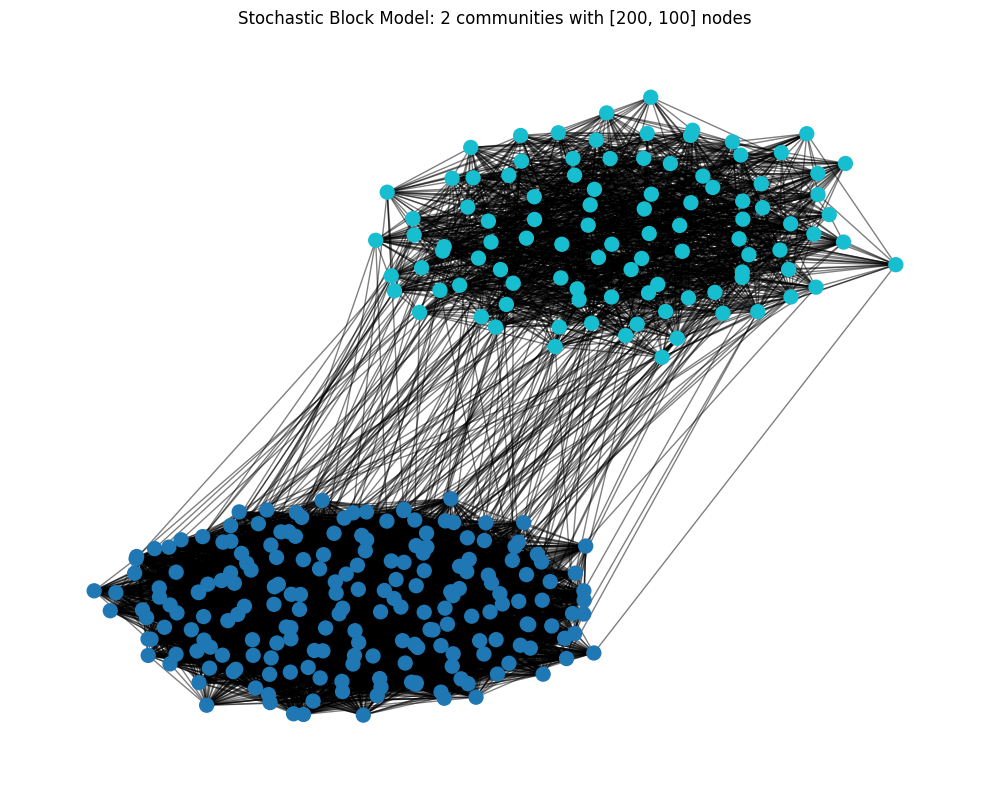

Number of nodes: 300
Number of edges: 7635
Average clustering coefficient: 0.2848
Average shortest path length: 2.0188


In [4]:
#@title Configure and Generate Graph { display-mode: "form" }

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, HTML

# Access model_type from previous cell
selected_model = model_type

#@markdown ## Common Parameters
num_nodes = 300 #@param {type:"slider", min:10, max:10000, step:10}
seed = 42 #@param {type:"integer"}
show_labels = False #@param {type:"boolean"}

#@markdown ## Erdös-Rényi Parameters
probability = 0.15 #@param {type:"slider", min:0.01, max:1.0, step:0.01}
directed = False #@param {type:"boolean"}

#@markdown ## Stochastic Block Model Parameters
num_communities = 2 #@param {type:"slider", min:2, max:6, step:1}
community_sizes = "200, 100" #@param {type:"string"}
within_community_probability = 0.3 #@param {type:"slider", min:0.01, max:1.0, step:0.01}
between_community_probability = 0.01 #@param {type:"slider", min:0.001, max:0.5, step:0.001}

#@markdown ## Random Geometric Parameters
radius = 0.2 #@param {type:"slider", min:0.05, max:0.5, step:0.01}
dimensions = 2 #@param {type:"slider", min:2, max:3, step:1}

# Use JavaScript to hide irrelevant parameter sections based on the model type
display(HTML(f'''
<script>
// Use the selected model from Python
var selectedModel = "{selected_model}";

// Function to hide irrelevant parameter sections
function hideIrrelevantParameters() {{
    var formGroups = document.querySelectorAll('.form-group');

    for (var i = 0; i < formGroups.length; i++) {{
        var text = formGroups[i].innerText || '';

        // Keep common parameters visible
        if (text.includes('Common Parameters')) {{
            continue;
        }}

        // Hide/show based on model type
        if (selectedModel === "Erdös-Rényi") {{
            if (text.includes('Stochastic Block Model Parameters') ||
                text.includes('Random Geometric Parameters')) {{
                formGroups[i].style.display = 'none';
            }}
        }} else if (selectedModel === "Stochastic Block Model") {{
            if (text.includes('Erdös-Rényi Parameters') ||
                text.includes('Random Geometric Parameters')) {{
                formGroups[i].style.display = 'none';
            }}
        }} else if (selectedModel === "Random Geometric") {{
            if (text.includes('Erdös-Rényi Parameters') ||
                text.includes('Stochastic Block Model Parameters')) {{
                formGroups[i].style.display = 'none';
            }}
        }}
    }}
}}

// Run after a short delay to ensure the DOM is fully loaded
setTimeout(hideIrrelevantParameters, 500);
</script>
'''))

# Create the appropriate graph based on the model type
if selected_model == "Erdös-Rényi":
    # Create Erdös-Rényi graph
    G = nx.erdos_renyi_graph(n=num_nodes, p=probability, seed=seed, directed=directed)
    title = f"Erdös-Rényi Graph: {num_nodes} nodes, p={probability}"
    pos = nx.spring_layout(G, seed=seed)

elif selected_model == "Stochastic Block Model":
    # Process community sizes
    try:
        sizes = [int(s.strip()) for s in community_sizes.split(",")]
        if len(sizes) != num_communities:
            sizes = [num_nodes // num_communities] * num_communities
    except:
        sizes = [num_nodes // num_communities] * num_communities

    # Ensure sizes sum to num_nodes
    total = sum(sizes)
    if total != num_nodes:
        sizes[-1] += (num_nodes - total)

    # Create probability matrix
    p = [[between_community_probability for _ in range(num_communities)] for _ in range(num_communities)]
    for i in range(num_communities):
        p[i][i] = within_community_probability

    # Create the graph
    G = nx.stochastic_block_model(sizes, p, seed=seed)
    title = f"Stochastic Block Model: {num_communities} communities with {sizes} nodes"
    pos = nx.spring_layout(G, seed=seed)

else:  # Random Geometric
    # Create Random Geometric graph
    G = nx.random_geometric_graph(n=num_nodes, radius=radius, dim=dimensions, seed=seed)
    title = f"Random Geometric Graph: {num_nodes} nodes, radius={radius}, dim={dimensions}"
    pos = nx.get_node_attributes(G, 'pos')

# Draw the graph
fig = plt.figure(figsize=(10, 8))
plt.title(title)

# Add community colors for Stochastic Block Model
if selected_model == "Stochastic Block Model":
    # Get node communities from graph
    communities = [data['block'] for _, data in G.nodes(data=True)]
    nx.draw_networkx_nodes(G, pos, node_color=communities, cmap=plt.cm.tab10, node_size=100)
    nx.draw_networkx_edges(G, pos, alpha=0.5)
else:
    nx.draw(G, pos, with_labels=show_labels, node_size=100, node_color='lightblue',
            edge_color='gray', alpha=0.7)

plt.axis('off')
plt.tight_layout()
plt.show()

# Show graph statistics
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Average clustering coefficient: {round(nx.average_clustering(G), 4)}")
try:
    if nx.is_connected(G):
        print(f"Average shortest path length: {round(nx.average_shortest_path_length(G), 4)}")
    else:
        print("Graph is not connected - cannot compute average shortest path length")
except:
    print("Could not compute average shortest path length (possibly directed graph)")

# Hide the code
display(HTML('''
<script>
var cell = document.querySelector('.input');
if (cell) cell.style.display = 'none';
</script>
'''))


In [5]:
fig.savefig(cwd + sep + f"{model_type}_graph.png")

In [61]:
#@title SIRVD Model Parameters { display-mode: "form" }
#@markdown ## Configure SIRVD Model Parameters

#@markdown ### Mortality and Vaccination Parameters
MU_H = 0.00081 #@param {type:"slider", min:0.0, max:0.05, step:0.00001}
#@markdown Natural human mortality rate

V_H = 0.0 #@param {type:"slider", min:0.0, max:1.0, step:0.01}
#@markdown Probability of vaccination

#@markdown ### Infection Parameters
BETA_H = 0.02736 #@param {type:"slider", min:0.0, max:0.1, step:0.00001}
#@markdown Probability of exposure

BETA_HV = 0.02538 #@param {type:"slider", min:0.0, max:0.1, step:0.00001}
#@markdown Probability of becoming exposed for a vaccinated individual

#@markdown ### Disease Progression Parameters
ALPHA_H = 0.42 #@param {type:"slider", min:0.0, max:1.0, step:0.01}
#@markdown Probability of becoming infected when susceptible

GAMMA_H = 0.7 #@param {type:"slider", min:0.0, max:1.0, step:0.01}
#@markdown Probability of recovery

DELTA_H = 0.08 #@param {type:"slider", min:0.0, max:1.0, step:0.01}
#@markdown Mortality rate for infected individuals

# Store parameters in a dictionary
params = {
    "MU_H": MU_H,
    "V_H": V_H,
    "BETA_H": BETA_H,
    "BETA_HV": BETA_HV,
    "ALPHA_H": ALPHA_H,
    "GAMMA_H": GAMMA_H,
    "DELTA_H": DELTA_H
}

# Display the current parameter values in a formatted way
from IPython.display import display, HTML, Markdown

# Create a summary table of the parameters
parameters_summary = """
| Parameter | Value | Description |
|-----------|-------|-------------|
| MU_H | {:.5f} | Natural human mortality |
| V_H | {:.2f} | Probability of vaccination |
| BETA_H | {:.6f} | Probability of exposure |
| BETA_HV | {:.6f} | Probability of becoming exposed for a vaccinated individual |
| ALPHA_H | {:.2f} | Probability of becoming infected when susceptible |
| GAMMA_H | {:.2f} | Probability of recovery |
| DELTA_H | {:.2f} | Mortality rate for infected individuals |
""".format(MU_H, V_H, BETA_H, BETA_HV, ALPHA_H, GAMMA_H, DELTA_H)

display(Markdown(parameters_summary))

# Hide the code
display(HTML('''
<script>
var cell = document.querySelector('.input');
if (cell) cell.style.display = 'none';
</script>
'''))



| Parameter | Value | Description |
|-----------|-------|-------------|
| MU_H | 0.00081 | Natural human mortality |
| V_H | 0.00 | Probability of vaccination |
| BETA_H | 0.027360 | Probability of exposure |
| BETA_HV | 0.025380 | Probability of becoming exposed for a vaccinated individual |
| ALPHA_H | 0.42 | Probability of becoming infected when susceptible |
| GAMMA_H | 0.70 | Probability of recovery |
| DELTA_H | 0.08 | Mortality rate for infected individuals |


In [68]:
params_vax = params.copy()
params_vax["V_H"] = 0.005
sim_params = {
    "no_vax": params,
    "vax": params_vax,
    "vax_target": params_vax
}
sim_params

{'no_vax': {'MU_H': 0.00081,
  'V_H': 0.0,
  'BETA_H': 0.02736,
  'BETA_HV': 0.02538,
  'ALPHA_H': 0.42,
  'GAMMA_H': 0.7,
  'DELTA_H': 0.08},
 'vax': {'MU_H': 0.00081,
  'V_H': 0.005,
  'BETA_H': 0.02736,
  'BETA_HV': 0.02538,
  'ALPHA_H': 0.42,
  'GAMMA_H': 0.7,
  'DELTA_H': 0.08},
 'vax_target': {'MU_H': 0.00081,
  'V_H': 0.005,
  'BETA_H': 0.02736,
  'BETA_HV': 0.02538,
  'ALPHA_H': 0.42,
  'GAMMA_H': 0.7,
  'DELTA_H': 0.08}}

<ipython-input-69-7fb6d063a8a9>:162: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  self._cmap = plt.cm.get_cmap('tab20') # Matplotlib colormap for node color coding


{0: 'Sh', 1: 'Sh', 2: 'Sh', 3: 'Sh', 4: 'Sh', 5: 'Sh', 6: 'Sh', 7: 'Sh', 8: 'Sh', 9: 'Sh', 10: 'Sh', 11: 'Sh', 12: 'Sh', 13: 'Sh', 14: 'Sh', 15: 'Sh', 16: 'Sh', 17: 'Sh', 18: 'Sh', 19: 'Sh', 20: 'Sh', 21: 'Sh', 22: 'Sh', 23: 'Sh', 24: 'Sh', 25: 'Sh', 26: 'Sh', 27: 'Sh', 28: 'Sh', 29: 'Sh', 30: 'Sh', 31: 'Sh', 32: 'Sh', 33: 'Sh', 34: 'Sh', 35: 'Sh', 36: 'Sh', 37: 'Sh', 38: 'Sh', 39: 'Sh', 40: 'Sh', 41: 'Sh', 42: 'Sh', 43: 'Sh', 44: 'Sh', 45: 'Sh', 46: 'Sh', 47: 'Sh', 48: 'Sh', 49: 'Sh', 50: 'Sh', 51: 'Sh', 52: 'Sh', 53: 'Sh', 54: 'Sh', 55: 'Sh', 56: 'Sh', 57: 'Sh', 58: 'Sh', 59: 'Sh', 60: 'Sh', 61: 'Sh', 62: 'Sh', 63: 'Sh', 64: 'Sh', 65: 'Sh', 66: 'Sh', 67: 'Sh', 68: 'Sh', 69: 'Sh', 70: 'Sh', 71: 'Sh', 72: 'Sh', 73: 'Sh', 74: 'Sh', 75: 'Sh', 76: 'Sh', 77: 'Sh', 78: 'Sh', 79: 'Sh', 80: 'Sh', 81: 'Sh', 82: 'Sh', 83: 'Sh', 84: 'Sh', 85: 'Sh', 86: 'Sh', 87: 'Sh', 88: 'Sh', 89: 'Sh', 90: 'Sh', 91: 'Sh', 92: 'Sh', 93: 'Sh', 94: 'Sh', 95: 'Sh', 96: 'Sh', 97: 'Sh', 98: 'Sh', 99: 'Sh', 100: 'Sh'

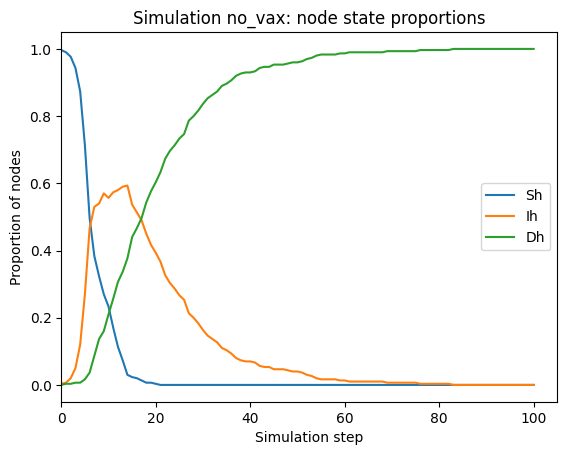

{0: 'Sh', 1: 'Sh', 2: 'Sh', 3: 'Sh', 4: 'Sh', 5: 'Sh', 6: 'Sh', 7: 'Sh', 8: 'Sh', 9: 'Sh', 10: 'Sh', 11: 'Sh', 12: 'Sh', 13: 'Sh', 14: 'Sh', 15: 'Sh', 16: 'Sh', 17: 'Sh', 18: 'Sh', 19: 'Sh', 20: 'Sh', 21: 'Sh', 22: 'Sh', 23: 'Sh', 24: 'Sh', 25: 'Sh', 26: 'Sh', 27: 'Sh', 28: 'Sh', 29: 'Sh', 30: 'Sh', 31: 'Sh', 32: 'Sh', 33: 'Sh', 34: 'Sh', 35: 'Sh', 36: 'Sh', 37: 'Sh', 38: 'Sh', 39: 'Sh', 40: 'Sh', 41: 'Sh', 42: 'Sh', 43: 'Sh', 44: 'Sh', 45: 'Sh', 46: 'Sh', 47: 'Sh', 48: 'Sh', 49: 'Sh', 50: 'Sh', 51: 'Sh', 52: 'Sh', 53: 'Sh', 54: 'Sh', 55: 'Sh', 56: 'Sh', 57: 'Sh', 58: 'Sh', 59: 'Sh', 60: 'Sh', 61: 'Sh', 62: 'Sh', 63: 'Sh', 64: 'Sh', 65: 'Sh', 66: 'Sh', 67: 'Sh', 68: 'Sh', 69: 'Sh', 70: 'Sh', 71: 'Sh', 72: 'Sh', 73: 'Sh', 74: 'Sh', 75: 'Sh', 76: 'Sh', 77: 'Sh', 78: 'Sh', 79: 'Sh', 80: 'Sh', 81: 'Sh', 82: 'Sh', 83: 'Sh', 84: 'Sh', 85: 'Sh', 86: 'Sh', 87: 'Sh', 88: 'Sh', 89: 'Sh', 90: 'Sh', 91: 'Sh', 92: 'Sh', 93: 'Sh', 94: 'Sh', 95: 'Sh', 96: 'Sh', 97: 'Sh', 98: 'Sh', 99: 'Sh', 100: 'Sh'

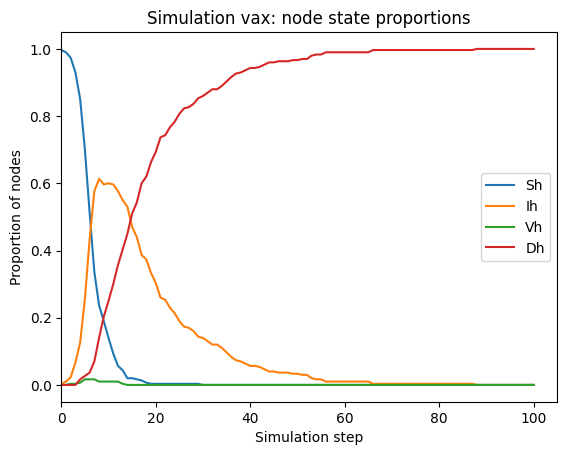

{0: 'Sh', 1: 'Sh', 2: 'Sh', 3: 'Sh', 4: 'Sh', 5: 'Sh', 6: 'Sh', 7: 'Sh', 8: 'Sh', 9: 'Sh', 10: 'Sh', 11: 'Sh', 12: 'Sh', 13: 'Sh', 14: 'Sh', 15: 'Sh', 16: 'Sh', 17: 'Sh', 18: 'Sh', 19: 'Sh', 20: 'Sh', 21: 'Sh', 22: 'Sh', 23: 'Sh', 24: 'Sh', 25: 'Sh', 26: 'Sh', 27: 'Sh', 28: 'Sh', 29: 'Sh', 30: 'Sh', 31: 'Sh', 32: 'Sh', 33: 'Sh', 34: 'Sh', 35: 'Sh', 36: 'Sh', 37: 'Sh', 38: 'Sh', 39: 'Sh', 40: 'Sh', 41: 'Sh', 42: 'Sh', 43: 'Sh', 44: 'Sh', 45: 'Sh', 46: 'Sh', 47: 'Sh', 48: 'Sh', 49: 'Sh', 50: 'Sh', 51: 'Sh', 52: 'Sh', 53: 'Sh', 54: 'Sh', 55: 'Sh', 56: 'Sh', 57: 'Sh', 58: 'Sh', 59: 'Sh', 60: 'Sh', 61: 'Sh', 62: 'Sh', 63: 'Sh', 64: 'Sh', 65: 'Sh', 66: 'Sh', 67: 'Sh', 68: 'Sh', 69: 'Sh', 70: 'Sh', 71: 'Sh', 72: 'Sh', 73: 'Sh', 74: 'Sh', 75: 'Sh', 76: 'Sh', 77: 'Sh', 78: 'Sh', 79: 'Sh', 80: 'Sh', 81: 'Sh', 82: 'Sh', 83: 'Sh', 84: 'Sh', 85: 'Sh', 86: 'Sh', 87: 'Sh', 88: 'Sh', 89: 'Sh', 90: 'Sh', 91: 'Sh', 92: 'Sh', 93: 'Sh', 94: 'Sh', 95: 'Sh', 96: 'Sh', 97: 'Sh', 98: 'Sh', 99: 'Sh', 100: 'Sh'

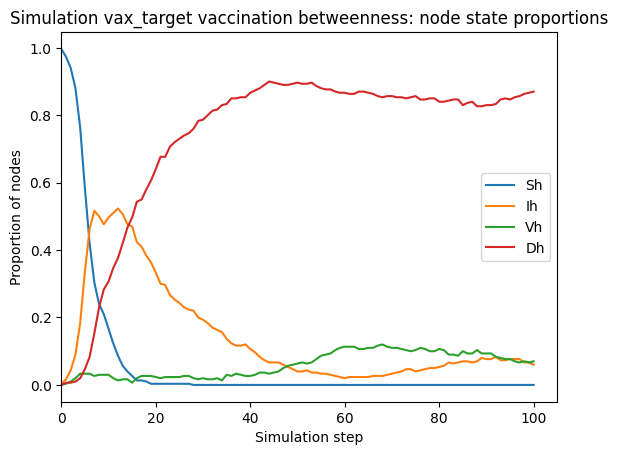

In [69]:
from collections import Counter
from operator import itemgetter
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

def initial_state(G):

    state = {}

    for node in G.nodes:
        state[node] = "Sh"
    print(state)
    # Randomly select patient zero (one human)
    paziente_zero_h = random.choice([node for node, s in state.items() if s == "Sh"])
    state[paziente_zero_h] = "Ih"  # Set one human as infected

    nx.set_node_attributes(G, state, 'state')

    return state

def count_nodestates(current_state):
    # Count number of nodes for each state
    count = {
        'Sh': sum(1 for state in current_state.values() if state == 'Sh'),
        'Ih': sum(1 for state in current_state.values() if state == 'Ih'),
        'Rh': sum(1 for state in current_state.values() if state == 'Rh'),
        'Vh': sum(1 for state in current_state.values() if state == 'Vh'),
        'Dh': sum(1 for state in current_state.values() if state == 'Dh'),
    }
    return count

def count_nodetypes(current_state):
    count = {
        'human': sum(1 for state in current_state.values() if state[-1] == "h"),
    }
    return count

def state_transition(G, current_state, prec_states, params, step, vaccination_type = "random"):

    next_state = current_state.copy()  # Copy of the current state to avoid direct modifications
    count_states = count_nodestates(current_state)
    count_types = count_nodetypes(current_state)
    print(f"Step {step}: {count_states}")

    if vaccination_type not in ["random", "betweenness"]:
        raise ValueError("Invalid vaccination type. Must be 'random' or 'betweenness'.")

    if vaccination_type == "betweenness":
        print("Betweenness vaccinations")
        betweenness_centrality = nx.betweenness_centrality(G, k = 1)
        print("end centrality computation")
        betweenness_centrality = dict(sorted(betweenness_centrality.items(), key=lambda item: item[1]))
        top_nodes = list(betweenness_centrality.keys())[:int(len(betweenness_centrality) * 0.1)]

        for node, centrality in betweenness_centrality.items():
            if node in top_nodes:
                if random.random() < params["V_H"]:
                    next_state[node] = "Vh"
            else:
                if random.random() < params["V_H"]:
                    next_state[node] = "Vh"
        print("end betweenness vaccinations")

    # Transitions for each state
    for node in G.nodes:
        # Case 1: Transition from susceptible to death ('SH')
        if current_state[node] == 'Sh':
            nh = count_types["human"]
            ih = count_states["Ih"]
            sh = count_states["Sh"]
            if random.random() < params["MU_H"]:
                next_state[node] = 'Dh'  # Transition to death
            else:
                if vaccination_type == "random":
                    if random.random() < params["V_H"]:  # Check if the susceptible node can become a vaccinated susceptible ('Sv')
                        next_state[node] = 'Vh'  # Node becomes vaccinated susceptible

                # Check if there are infected neighbors (humans or rodents)
                for neighbor in G.neighbors(node):
                    if current_state[neighbor] in ['Ih']:  # Infected neighbor
                        if random.random() < (params["BETA_H"]):
                            next_state[node] = 'Ih'  # Node becomes infected
                            break

        elif current_state[node] == 'Vh':
            if random.random() < params["MU_H"]:
                next_state[node] = 'Dh'  # Transition to death
            else:
                nh = count_types["human"]
                ih = count_states["Ih"]
                sh = count_states["Sh"]
                for neighbor in G.neighbors(node):  # Check if there are infected neighbors (humans or rodents)
                    if current_state[neighbor] in ['Ih']:  # Infected neighbor
                        if random.random() < ((params["BETA_HV"])):
                            next_state[node] = 'Ih'  # Node becomes an infected vaccinated
                            break

        elif current_state[node] == 'Ih':
            if random.random() < (params["MU_H"] + params["DELTA_H"]):
                next_state[node] = 'Dh'  # Transition to death

        elif current_state[node] == "Rh":
            if random.random() < params["MU_H"]:
                next_state[node] = "Dh"  # Transition to death

    return next_state

class StopCondition(StopIteration):
    pass #no stop conditions for now

class Simulation:
    '''Simulate state transitions on a network graph

        Simulation class for Chapter 7 Tutorial of Intro Network Science book
        Copyright 2018 Indiana University and Cambridge University Press
        https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience/blob/master/tutorials/simulation.py
    '''

    def __init__(self, G, initial_state, state_transition, params,
                 stop_condition=None, vaccination_type = "random", name=''):
        '''
        Initialize a Simulation instance.

        Args:
            G: A networkx.Graph instance representing the network.
            initial_state: Function with signature `initial_state(G)` that
                takes the graph as input and returns a dictionary of initial
                states for each node, where keys are node names and values are
                initial states.
            state_transition: Function with signature `state_transition(G, current_state)`
                that takes the graph and a dictionary of current node states, and returns
                updated states for each node.
            stop_condition (optional): Function with signature `stop_condition(G, current_state)`
                that takes the graph and the current states dictionary, returning True if
                the simulation should stop.

        Keyword Args:
            name (optional): A string for naming the simulation, used in plot titles.

        Raises:
            ValueError: If not all graph nodes have an initial state.

        '''
        self.G = G.copy()
        self._initial_state = initial_state
        self._state_transition = state_transition
        self._stop_condition = stop_condition
        self.params = params
        self.vaccination_type = vaccination_type

        # Ensure stop_condition is callable if provided
        if stop_condition and not callable(stop_condition):
            raise TypeError("'stop_condition' should be a function")

        self.name = name or 'Simulation'

        # Initialize state storage and mapping variables
        self._states = []                    # Holds the states of all nodes at each step
        self._value_index = {}
        self._cmap = plt.cm.get_cmap('tab20') # Matplotlib colormap for node color coding

        self._initialize()                   # Run initial setup for nodes' states

        # Set up node positions for consistent layout in visualizations
        self._pos = nx.layout.spring_layout(G)

    def _append_state(self, state):
        '''Append the current state to the state list and update unique state index mapping.'''
        self._states.append(state)           # Save current state to state history

        # Update state mapping for new values
        for value in set(state.values()):
            if value not in self._value_index:
                self._value_index[value] = len(self._value_index)  # Assign a new index to unseen states

    def _initialize(self):
        '''Set initial states for nodes and ensure all nodes have an assigned state.'''
        if self._initial_state:
            # Determine initial state based on provided function or dictionary
            state = self._initial_state(self.G) if callable(self._initial_state) else self._initial_state
            nx.set_node_attributes(self.G, state, 'state')  # Apply initial states to nodes as attributes

        # Check that all nodes have been assigned an initial state
        if any(self.G.nodes[n].get('state') is None for n in self.G.nodes):
            raise ValueError('All nodes must have an initial state')

        self._append_state(state)  # Save initial state as the first entry in state history

    def _step(self):
        '''Perform a single step of the simulation, updating states for each node.'''
        state = nx.get_node_attributes(self.G, 'state')  # Retrieve current node states

        # Check if stop condition is met
        if self._stop_condition and self._stop_condition(self.G, state):
            raise StopCondition  # Stop simulation if condition is met

        step = len(self._states) - 1  # Current step index
        new_state = self._state_transition(self.G, state, self._states, self.params, step, self.vaccination_type)  # Compute new states based on transition function
        state.update(new_state)                            # Update the current state with new values
        nx.set_node_attributes(self.G, state, 'state')     # Apply updated states to nodes as attributes
        self._append_state(state)                          # Record new state in history

    def _categorical_color(self, value):
        '''Return color for a node based on its state value.'''
        index = self._value_index[value]        # Retrieve color index for the state
        return self._cmap(index)                # Return color from colormap for given index

    @property
    def steps(self):
        '''Return the number of steps the simulation has run.'''
        return len(self._states) - 1

    def state(self, step=-1):
        '''
        Retrieve a specific state of the simulation, defaulting to the latest state.

        Args:
            step: The step index to retrieve; defaults to -1 for the latest state.

        Returns:
            Dictionary of node states.

        Raises:
            IndexError: If requested step is beyond available steps.
        '''
        try:
            return self._states[step]
        except IndexError:
            raise IndexError(f'Simulation step {step} out of range')

    def draw(self, step=-1, labels=None, **kwargs):
        '''
        Draw a simulation state, coloring nodes by their state values.

        Args:
            step: The step index to draw; defaults to -1 for the latest state.
            kwargs: Additional arguments for networkx.draw()

        Raises:
            IndexError: If requested step is beyond available steps.
        '''
        state = self.state(step)
        node_colors = [self._categorical_color(state[n]) for n in self.G.nodes]
        nx.draw(self.G, pos=self._pos, node_color=node_colors, **kwargs)

        # Configure and display legend for unique states
        if labels is None:
            labels = set(state.values())
        patches = [mpl.patches.Patch(color=self._categorical_color(l), label=l)
                   for l in labels]
        plt.legend(handles=patches)

        # Set title to display the current step or 'initial state' if at step 0
        step_title = 'initial state' if step == 0 else f'step {step}'
        plt.title(f'{self.name}: {step_title}')

    def plot(self, min_step=None, max_step=None, labels=None, **kwargs):
        '''
        Plot the proportion of nodes in each state over the simulation steps.

        Args:
            min_step: First step to include in the plot (defaults to start of simulation).
            max_step: Last step to include in the plot, non-inclusive (defaults to latest step).
            labels: Ordered sequence of states to plot (defaults to all observed states).
            kwargs: Additional arguments for plt.plot()

        Returns:
            Matplotlib Axes object for the current plot.
        '''
        x_range = range(min_step or 0, max_step or len(self._states))
        counts = [Counter(s.values()) for s in self._states[min_step:max_step]]

        fig = plt.figure()

        if labels is None:
            labels = sorted({k for count in counts for k in count}, key=self._value_index.get)

        # Plot proportion of nodes in each state over steps
        for label in labels:
            series = [count.get(label, 0) / sum(count.values()) for count in counts]
            plt.plot(x_range, series, label=label, **kwargs)

        # Configure plot labels and title
        plt.title(f'{self.name}: node state proportions')
        plt.xlabel('Simulation step')
        plt.ylabel('Proportion of nodes')
        plt.legend()
        plt.xlim(x_range.start)

        return fig

    def run(self, steps=1):
        '''
        Run the simulation for a specified number of steps.

        Args:
            steps: Number of steps to advance the simulation (default is 1).
        '''
        for _ in range(steps):
            try:
                self._step()
            except StopCondition:
                print(f"Stop condition met at step {self.steps}")
                break

def categorical_color(value_index, value):
  '''Return color for a node based on its state value.'''
  cmap = plt.cm.get_cmap('tab20') # Matplotlib colormap for node color coding
  index = value_index[value]      # Retrieve color index for the state
  return cmap(index)               # Return color from colormap for given index


#@markdown ### Number of iteration steps
steps = 100 #@param {type:"slider", min:1.0, max:1000, step:1}
#@markdown Number of iteration steps

sims = {}
for type, sim in sim_params.items():

  if "target" in type:
    sims[type] = Simulation(G, initial_state, state_transition, sim, vaccination_type="betweenness", name=f"Simulation {type} vaccination betweenness")
  else:
    sims[type] = Simulation(G, initial_state, state_transition, sim, name=f"Simulation {type}")
  sims[type].run(steps)
  fig = sims[type].plot()
  fig.savefig(cwd + sep + f"{type}.png")
  plt.show()

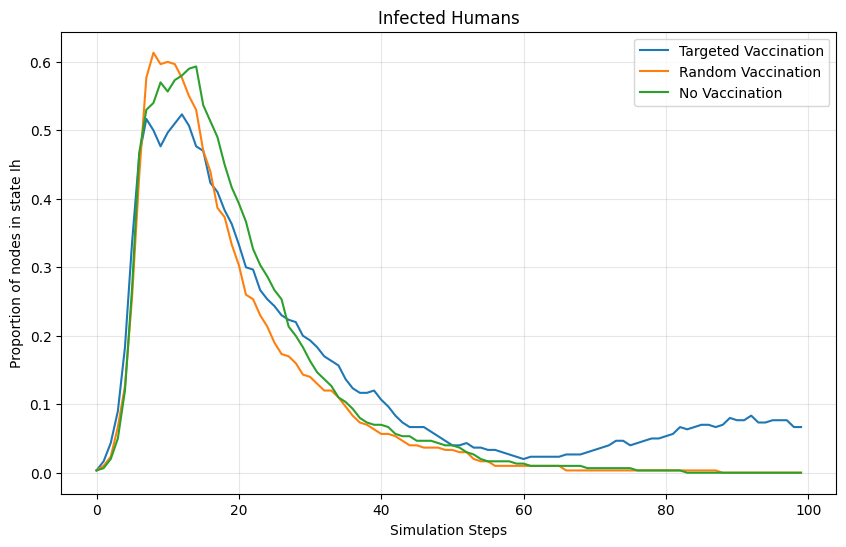

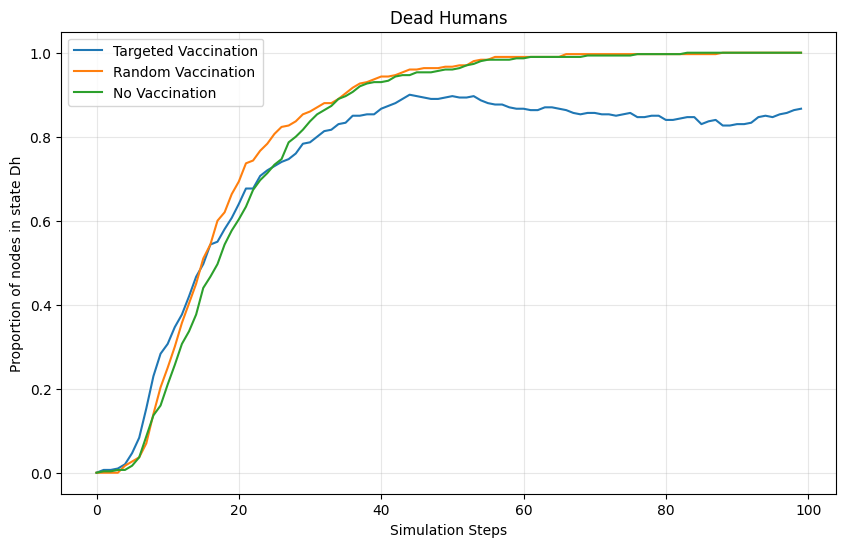

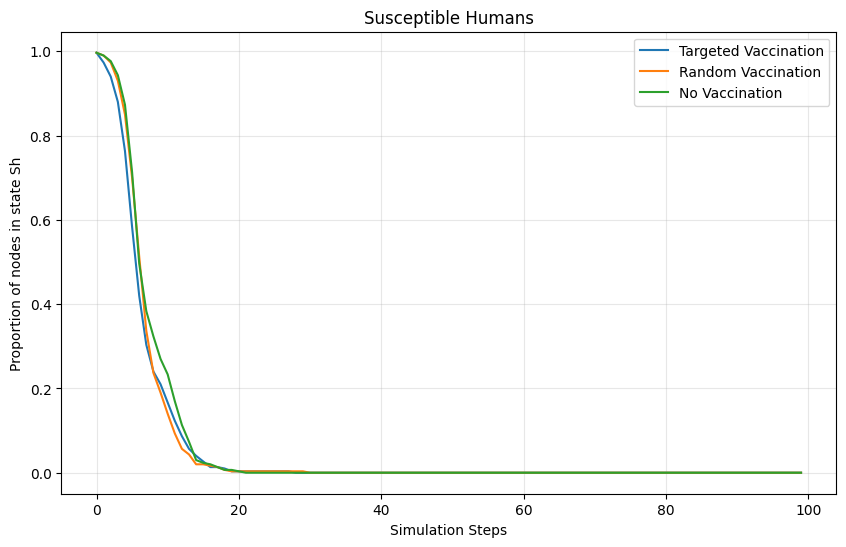

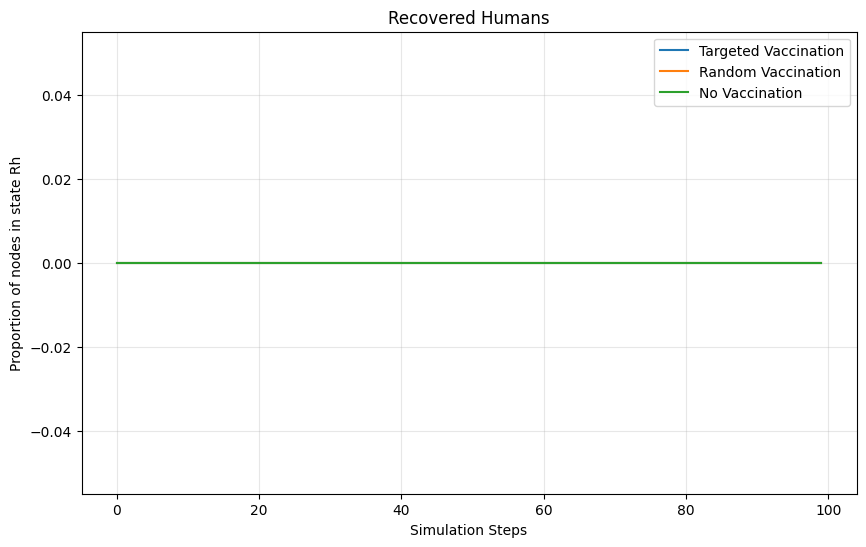

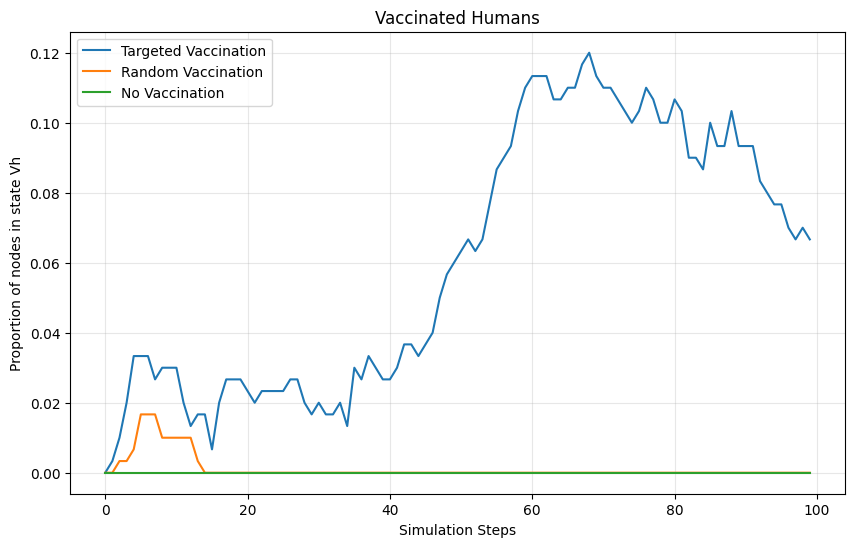

In [70]:
#@title SIRVD Model Visualization { display-mode: "form" }
#@markdown ### Select states and vaccination strategies to visualize

#@markdown ## Select states to plot
plot_infected = True #@param {type:"boolean"}
plot_dead = True #@param {type:"boolean"}
plot_susceptible = True #@param {type:"boolean"}
plot_recovered = True #@param {type:"boolean"}
plot_vaccinated = True #@param {type:"boolean"}

#@markdown ## Select vaccination strategies to compare
show_targeted_vaccination = True #@param {type:"boolean"}
show_random_vaccination = True #@param {type:"boolean"}
show_no_vaccination = True #@param {type:"boolean"}

import matplotlib.pyplot as plt
from collections import Counter
import os

# Map selections to state codes
states_to_plot = []
if plot_infected:
    states_to_plot.append("Ih")
if plot_dead:
    states_to_plot.append("Dh")
if plot_susceptible:
    states_to_plot.append("Sh")
if plot_recovered:
    states_to_plot.append("Rh")
if plot_vaccinated:
    states_to_plot.append("Vh")

# Map selections to strategy keys
strategies_to_plot = []
if show_targeted_vaccination:
    strategies_to_plot.append("vax_target")
if show_random_vaccination:
    strategies_to_plot.append("vax")
if show_no_vaccination:
    strategies_to_plot.append("no_vax")

# Verify we have at least one state and strategy selected
if not states_to_plot:
    print("Error: Please select at least one state to plot")

if not strategies_to_plot:
    print("Error: Please select at least one vaccination strategy")

# If selections are valid, continue with plotting
if states_to_plot and strategies_to_plot:
    # Create dictionary to store data for plotting
    to_plot_strategies = {}

    # Process data from simulations
    for type, sim in sims.items():
        if type not in strategies_to_plot:
            continue

        temp = {st: [] for st in states_to_plot}
        for step in range(steps):
            states = sim.state(step=step)
            count_states = Counter(states.values())
            den = sum(count_states.values())
            for st in states_to_plot:
                if st in count_states:
                    temp[st].append(count_states[st]/den)
                else:
                    temp[st].append(0)  # Handle missing states

        to_plot_strategies[type] = temp

    # Create plots
    for st in states_to_plot:
        fig = plt.figure(figsize=(10, 6))

        # Set appropriate title
        if st == "Ih":
            plt.title("Infected Humans")
        elif st == "Dh":
            plt.title("Dead Humans")
        elif st == "Rh":
            plt.title("Recovered Humans")
        elif st == "Sh":
            plt.title("Susceptible Humans")
        elif st == "Vh":
            plt.title("Vaccinated Humans")

        # Plot each selected strategy
        for strategy in strategies_to_plot:
            if strategy in to_plot_strategies and st in to_plot_strategies[strategy]:
                label = {
                    "vax_target": "Targeted Vaccination",
                    "vax": "Random Vaccination",
                    "no_vax": "No Vaccination"
                }.get(strategy, strategy)

                plt.plot(to_plot_strategies[strategy][st], label=label)

        plt.xlabel("Simulation Steps")
        plt.ylabel(f"Proportion of nodes in state {st}")
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

# Hide the code
from IPython.display import display, HTML
display(HTML('''
<script>
var cell = document.querySelector('.input');
if (cell) cell.style.display = 'none';
</script>
'''))


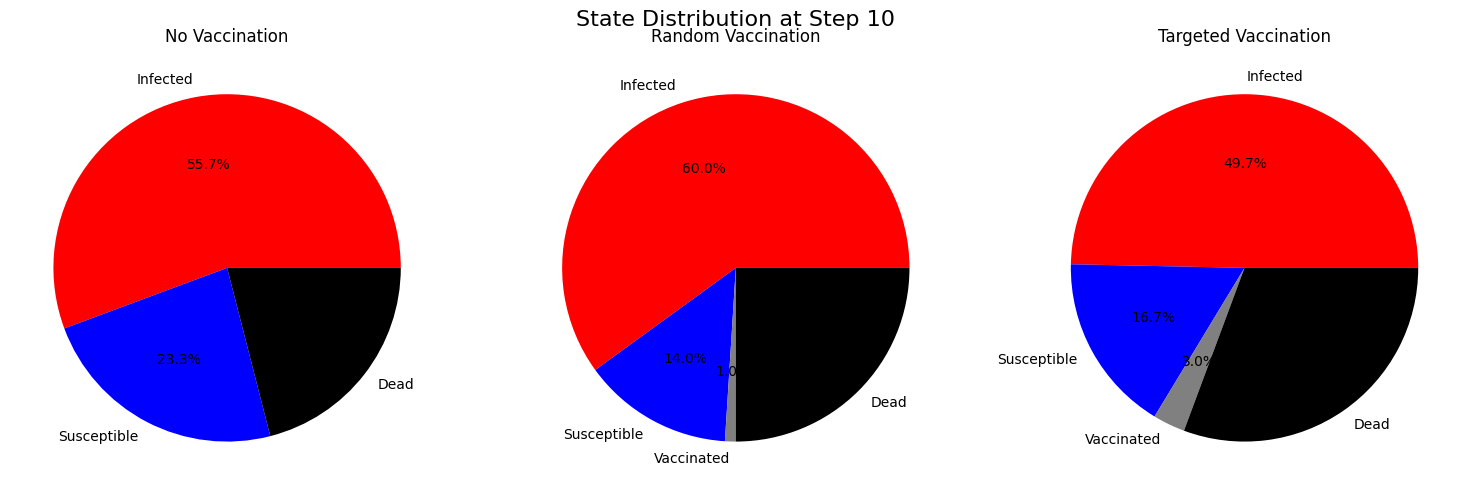

Selected step 10 for training
State distribution at this step:

No Vaccination:
  Dead: 63 nodes (21.0%)
  Infected: 167 nodes (55.7%)
  Susceptible: 70 nodes (23.3%)

Random Vaccination:
  Dead: 75 nodes (25.0%)
  Infected: 180 nodes (60.0%)
  Susceptible: 42 nodes (14.0%)
  Vaccinated: 3 nodes (1.0%)

Targeted Vaccination:
  Dead: 92 nodes (30.7%)
  Infected: 149 nodes (49.7%)
  Susceptible: 50 nodes (16.7%)
  Vaccinated: 9 nodes (3.0%)


In [75]:
#@title Select Simulation Step for Training { display-mode: "form" }
#@markdown ### Select a specific simulation step to use for training

train_step = 10 #@param {type:"slider", min:1, max:100, step:1}
#@markdown Select which simulation states to display

show_infected = True #@param {type:"boolean"}
show_susceptible = True #@param {type:"boolean"}
show_vaccinated = True #@param {type:"boolean"}
show_recovered = True #@param {type:"boolean"}
show_dead = True #@param {type:"boolean"}

import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from IPython.display import display, HTML

# Set which states to show in plot
states_to_show = []
if show_infected:
    states_to_show.append("Ih")
if show_susceptible:
    states_to_show.append("Sh")
if show_vaccinated:
    states_to_show.append("Vh")
if show_recovered:
    states_to_show.append("Rh")
if show_dead:
    states_to_show.append("Dh")

# Create a more friendly state name mapping
state_names = {
    "Ih": "Infected",
    "Sh": "Susceptible",
    "Vh": "Vaccinated",
    "Rh": "Recovered",
    "Dh": "Dead"
}

# Plot the state distribution at the selected step for each simulation
fig, ax = plt.subplots(1, len(sims), figsize=(15, 5), sharey=True)
fig.suptitle(f'State Distribution at Step {train_step}', fontsize=16)

for i, (type_name, sim) in enumerate(sims.items()):
    # Get states at the specified step
    states = sim.state(step=train_step)
    count_states = Counter(states.values())

    # Calculate total nodes for percentage
    total_nodes = sum(count_states.values())

    # Prepare data for plotting
    labels = []
    values = []
    colors = []

    # Define colors for each state
    color_map = {
        "Ih": "red",
        "Sh": "blue",
        "Eh": "orange",
        "Rh": "green",
        "Dh": "black"
    }

    # Only include states that should be shown
    for state in states_to_show:
        if state in count_states:
            labels.append(state_names.get(state, state))
            values.append(count_states[state] / total_nodes * 100)
            colors.append(color_map.get(state, "gray"))

    # Create the pie chart
    title = {
        "vax_target": "Targeted Vaccination",
        "vax": "Random Vaccination",
        "no_vax": "No Vaccination"
    }.get(type_name, type_name)

    ax[i].pie(values, labels=labels, autopct='%1.1f%%', colors=colors)
    ax[i].set_title(title)

plt.tight_layout()
plt.show()

# Print additional information about the selected step
print(f"Selected step {train_step} for training")
print("State distribution at this step:")

for type_name, sim in sims.items():
    states = sim.state(step=train_step)
    count_states = Counter(states.values())
    total = sum(count_states.values())

    strategy_name = {
        "vax_target": "Targeted Vaccination",
        "vax": "Random Vaccination",
        "no_vax": "No Vaccination"
    }.get(type_name, type_name)

    print(f"\n{strategy_name}:")
    for state in sorted(count_states.keys()):
        if state in states_to_show:
            print(f"  {state_names.get(state, state)}: {count_states[state]} nodes ({count_states[state]/total*100:.1f}%)")

# Hide the code
display(HTML('''
<script>
var cell = document.querySelector('.input');
if (cell) cell.style.display = 'none';
</script>
'''))


In [76]:
import numpy as np
import scipy
import sklearn
np.__version__, scipy.__version__, sklearn.__version__

('1.26.4', '1.13.1', '1.6.1')

GCN part: predict next simulation step with k-GCN

In [17]:
#@markdown ### Install Deep Learning libraries
!pip install torch_geometric
!pip install captum
#@markdown Install Deep Learning libraries

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.

Epoch 5000/5000, Loss: 0.7756, Train AUC: 0.9718, Val AUC: 0.8464


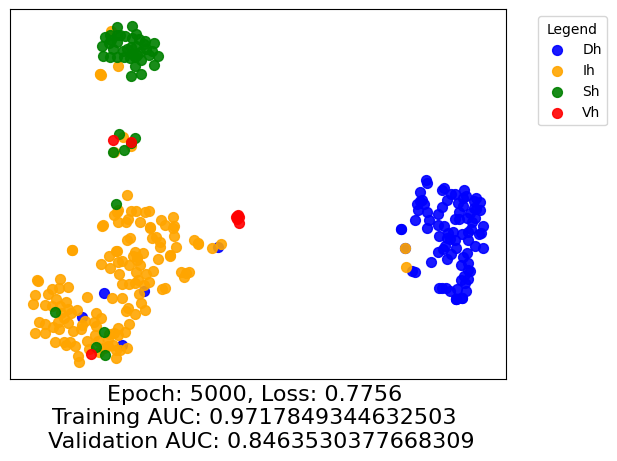

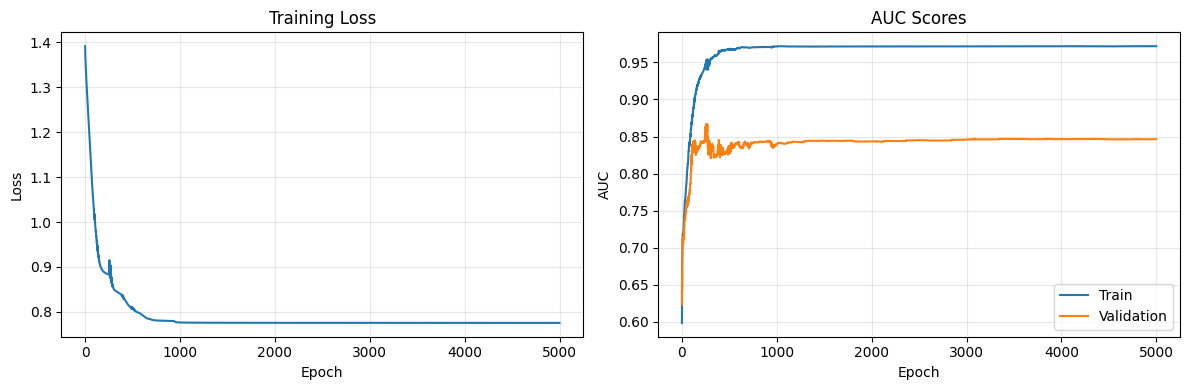


Class-wise AUC scores (validation set):
Dh: 0.9489 (samples: 27)
Ih: 0.8832 (samples: 45)
Sh: 0.9173 (samples: 15)
Vh: 0.6360 (samples: 3)

Final model node embeddings:


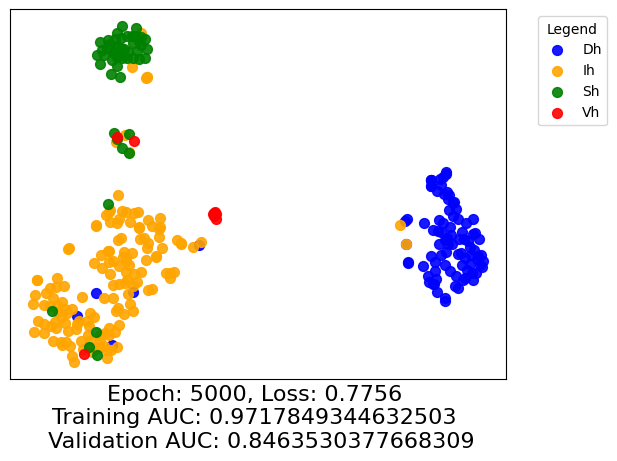

In [78]:
import torch
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import time
from IPython.display import Javascript  # Restrict height of output cell.
from sklearn.metrics import roc_auc_score
from torch_geometric.data import Data

# Helper function for visualization.
%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
#from umap import UMAP
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def parse_edges(edge_list):

    source_nodes = []
    target_nodes = []
    node_mapping = {}
    next_index = 0

    for edge in edge_list:
        source, target = edge
        #if source == target:
        #    continue
        if source not in node_mapping:
            node_mapping[source] = next_index
            next_index += 1
        if target not in node_mapping:
            node_mapping[target] = next_index
            next_index += 1

        source_nodes.append(node_mapping[source])
        target_nodes.append(node_mapping[target])

    return source_nodes, target_nodes, node_mapping

def create_edge_index(source_nodes, target_nodes):
    edge_list = np.array([source_nodes, target_nodes], dtype=np.int64)
    edge_index = torch.LongTensor(edge_list)
    return edge_index

def labels_to_int(y):

  labels_map = {}
  labels_int = []

  uq_y = np.unique(y)

  for i, label in enumerate(uq_y):
    labels_map[label] = i

  for i, label in enumerate(y):
    labels_int.append(labels_map[label])

  return labels_int, labels_map

def create_dataloader(sim, step = -1, vax = True, q = True):
    prec_state = sim.state(step=step-1)  # Previous state
    state = sim.state(step=step)        # Current state

    # Labels for classification (current state of nodes)
    y = [label for node, label in state.items()]
    y, labels_map = labels_to_int(y)
    y = torch.tensor(y).to(device)

    # Add prec_state attributes as features
    nx.set_node_attributes(sim.G, prec_state, 'prec_state')

    node_death = [1 if "D" in prec_state[node] else 0 for node in sim.G.nodes]
    node_death = torch.tensor(node_death).float().to(device)

    node_exp = [1 if "E" in prec_state[node] else 0 for node in sim.G.nodes]
    node_exp = torch.tensor(node_exp).float().to(device)

    if vax:
        node_vax = [1 if "V" in prec_state[node] else 0 for node in sim.G.nodes]
        node_vax = torch.tensor(node_vax).float().to(device)

    # Count infected neighbors (human and rodents)
    infected_neighbors_human = []
    for node in sim.G.nodes:
        if "D" in prec_state[node]:
            infected_neighbors_human.append(0.0)
        else:
            neighbors = sim.G.neighbors(node)
            human_infected = 0.0
            for neighbor in neighbors:
                neighbor_state = state[neighbor]
                if neighbor_state == 'Ih':
                    human_infected += 1.0
            tot = human_infected
            if tot == 0.0:
                infected_neighbors_human.append(0.0)
            else:
                infected_neighbors_human.append(human_infected/tot)

    # Convert to tensors
    infected_neighbors_human = torch.tensor(infected_neighbors_human).float().to(device)

    prec_state = list(prec_state.values())
    prec_state, _ = labels_to_int(prec_state)
    prec_state = torch.tensor(prec_state).float().to(device)

    # Create feature matrix x by concatenating all information
    if vax:
      x = torch.stack([prec_state, infected_neighbors_human, node_exp, node_vax, node_death], dim=1)
    else:
      x = torch.stack([prec_state, infected_neighbors_human, node_exp, node_death], dim=1)

    # Create edge_index
    edges = sim.G.edges
    source_nodes, target_nodes, node_mapping = parse_edges(edges)
    edge_index = create_edge_index(source_nodes, target_nodes)

    # Build PyTorch Geometric Data
    data = Data(x=x, edge_index=edge_index, y=y)

    return data, labels_map

# Visualization function for NX graph or PyTorch tensor
def visualize(h, colors, labels, epoch=None, loss=None, auc=None):

    colornames = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'yellow', 'cyan', 'magenta', 'lime']

    # Create scatter plot
    fig, ax = plt.subplots()
    plt.xticks([])
    plt.yticks([])

    umap = TSNE(n_components = 2)
    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
    h = umap.fit_transform(h)


    uq_colors = np.unique(colors)
    for j, c in enumerate(uq_colors):
      indices = [i for i, color in enumerate(colors) if color == c]
      plt.scatter(h[indices, 0], h[indices, 1], s=50, label=labels[j], color = colornames[j], alpha=0.9)
      if epoch is not None and loss is not None and auc['train'] is not None and auc['val'] is not None:
        plt.xlabel((f'Epoch: {epoch}, Loss: {loss.item():.4f} \n'
                       f'Training AUC: {auc["train"]} \n'
                       f' Validation AUC: {auc["val"]}'),
                       fontsize=16)

    # Adjust legend
    ax.legend(title="Legend", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

def compute_class_weights(labels):
    """
    Computes class weights based on the distribution of labels.

    :param labels: Tensor containing the class labels for each node.
    :return: A tensor containing the class weights.
    """
    # Calculate class weights using the sklearn library
    class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(labels.cpu()), y=labels.cpu().numpy())

    # Convert the weights to a tensor
    class_weights_tensor = torch.tensor(class_weights, dtype=torch.float).to(labels.device)

    return class_weights_tensor


    print(sim_type)
    if "no_vax" in sim_type:
      vax = False
    else:
      vax = True


datas = {}
labels_maps = {}
for sim_type, sim in sims.items():

    vax = True if "no" not in sim_type else False
    data, labels_map = create_dataloader(sim, step = train_step, vax = vax)

    # Assuming `data.y` contains the labels
    num_nodes = data.num_nodes
    train_size = 0.7  # 70% for training

    uqs, counts = np.unique(data.y.cpu(), return_counts=True)
    print(counts)
    indices = np.arange(0, num_nodes, 1)
    train_indices, test_indices = train_test_split(indices, train_size=train_size, stratify=data.y.cpu())
    train_mask = torch.zeros(num_nodes, dtype=torch.bool).to(device)
    test_mask = torch.zeros(num_nodes, dtype=torch.bool).to(device)
    train_mask[train_indices] = True
    test_mask[test_indices] = True
    data.train_mask = train_mask
    data.test_mask = test_mask

    datas[sim_type] = data.to(device)
    labels_maps[sim_type] = labels_map
#@title Configure GNN Training Parameters { display-mode: "form" }
#@markdown ## Model Architecture
hidden_channels = 64 #@param {type:"slider", min:16, max:256, step:16}
#@markdown Size of hidden layers in the GNN

out_channels = 32 #@param {type:"slider", min:8, max:128, step:8}
#@markdown Size of output features before classification

#@markdown ## Training Parameters
learning_rate = 0.001 #@param {type:"number"}
num_epochs = 5000 #@param {type:"slider", min:10, max:10000, step:10}

#@markdown ## Visualization Options
show_umap_during_training = True #@param {type:"boolean"}
#@markdown Whether to show UMAP plots during training

umap_frequency = 100 #@param {type:"slider", min:1, max:1000, step:1}
#@markdown Show UMAP visualization every N epochs

#@markdown ## Select Simulation
simulation_to_train = "vax_target" #@param ["no_vax", "vax", "vax_target"]
#@markdown Which simulation data to use for training

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch_geometric.nn import GraphConv
from torch_geometric.data import Data
import matplotlib.pyplot as plt
from umap import UMAP
from sklearn.metrics import roc_auc_score
import numpy as np
from IPython.display import display, HTML, clear_output

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Get the selected data
data = datas[simulation_to_train].to(device)
labels_map = labels_maps[simulation_to_train]

# Determine input channels from data
in_channels = data.x.shape[1]

# Reverse the labels map for interpretation
reverse_labels_map = {v: k for k, v in labels_map.items()}

# Define the GNN model as in the original code
class GCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GraphConv(in_channels, hidden_channels)
        self.conv2 = GraphConv(hidden_channels, hidden_channels)
        self.linear = nn.Linear(hidden_channels, out_channels)
        self.classifier = nn.Linear(out_channels, num_classes)

    def forward(self, x, edge_index, edge_weight=None):
        x = self.conv1(x, edge_index, edge_weight)
        x = F.tanh(x)
        x = self.conv2(x, edge_index, edge_weight)
        x = F.tanh(x)
        x = self.linear(x)
        x = F.tanh(x)
        x = self.classifier(x)  # Output for the classes
        x = F.softmax(x, dim=1)
        return x

    # Method to get embeddings for visualization
    def get_embeddings(self, x, edge_index, edge_weight=None):
        x = self.conv1(x, edge_index, edge_weight)
        x = F.tanh(x)
        x = self.conv2(x, edge_index, edge_weight)
        x = F.tanh(x)
        x = self.linear(x)
        x = F.tanh(x)
        return x

# Count number of classes
num_classes = len(torch.unique(data.y))

# Initialize the model
model = GCN(in_channels=in_channels,
            hidden_channels=hidden_channels,
            out_channels=out_channels,
            num_classes=num_classes).to(device)

# Set up optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Calculate class weights for imbalanced data
class_weights = compute_class_weights(data.y)
criterion = nn.CrossEntropyLoss(weight=class_weights)

# Training loop
train_losses = []
train_aucs = []
val_aucs = []

print(f"Training on {simulation_to_train} data with {num_classes} classes")
print(f"Device: {device}, Model: GCN with {in_channels} input, {hidden_channels} hidden, {out_channels} output channels")
print(f"Training for {num_epochs} epochs with Adam optimizer (lr={learning_rate})")
print(f"Class distribution: {np.bincount(data.y.cpu().numpy())}")
print("Starting training...\n")

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    out = model(data.x, data.edge_index)

    # Compute loss on training nodes
    loss = criterion(out[data.train_mask], data.y[data.train_mask])

    # Backward pass
    loss.backward()
    optimizer.step()

    # Evaluation
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index)

        # Get embeddings for visualization
        h = model.get_embeddings(data.x, data.edge_index)

        # Calculate AUC scores with one-hot encoding
        y_true_train = F.one_hot(data.y[data.train_mask], num_classes).float()
        y_pred_train = out[data.train_mask]

        y_true_val = F.one_hot(data.y[data.test_mask], num_classes).float()
        y_pred_val = out[data.test_mask]

        # Calculate AUC for each class and average (macro)
        train_auc = roc_auc_score(y_true_train.cpu(), y_pred_train.cpu(), multi_class='ovr', average='macro')
        val_auc = roc_auc_score(y_true_val.cpu(), y_pred_val.cpu(), multi_class='ovr', average='macro')

        train_losses.append(loss.item())
        train_aucs.append(train_auc)
        val_aucs.append(val_auc)

    # Print results
    if (epoch + 1) % 5 == 0 or epoch == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Train AUC: {train_auc:.4f}, Val AUC: {val_auc:.4f}')

    # Show UMAP visualization if enabled
    if show_umap_during_training and (epoch + 1) % umap_frequency == 0:
        if epoch > 0:  # Don't clear on first epoch
            clear_output(wait=True)
            print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Train AUC: {train_auc:.4f}, Val AUC: {val_auc:.4f}')

        # Use visualize function
        colors = data.y.cpu().numpy()
        label_names = [reverse_labels_map.get(i, f"Class {i}") for i in range(num_classes)]
        auc_dict = {"train": train_auc, "val": val_auc}
        visualize(h, colors, label_names, epoch+1, loss, auc_dict)

# Plot final training curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(train_aucs, label='Train')
plt.plot(val_aucs, label='Validation')
plt.title('AUC Scores')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Final evaluation
model.eval()
with torch.no_grad():
    out = model(data.x, data.edge_index)
    h = model.get_embeddings(data.x, data.edge_index)

    # Print class-wise performance
    print("\nClass-wise AUC scores (validation set):")
    y_true_val = F.one_hot(data.y[data.test_mask], num_classes).float().cpu().numpy()
    y_pred_val = out[data.test_mask].cpu().numpy()

    for i in range(num_classes):
        class_name = reverse_labels_map.get(i, f"Class {i}")
        num_samples = np.sum(y_true_val[:, i])

        try:
            if num_samples > 0:
                class_auc = roc_auc_score(y_true_val[:, i], y_pred_val[:, i])
                print(f"{class_name}: {class_auc:.4f} (samples: {int(num_samples)})")
            else:
                print(f"{class_name}: No samples in validation set")
        except:
            print(f"{class_name}: Not enough samples for AUC calculation")

    # Final UMAP visualization
    print("\nFinal model node embeddings:")
    colors = data.y.cpu().numpy()
    label_names = [reverse_labels_map.get(i, f"Class {i}") for i in range(num_classes)]
    auc_dict = {"train": train_aucs[-1], "val": val_aucs[-1]}
    visualize(h, colors, label_names, num_epochs, torch.tensor(train_losses[-1]), auc_dict)

# Hide the code
display(HTML('''
<script>
var cell = document.querySelector('.input');
if (cell) cell.style.display = 'none';
</script>
'''))


Classes: ['Dh', 'Ih', 'Sh', 'Vh']
Classification Report:
              precision    recall  f1-score   support

          Dh       0.98      0.95      0.96        92
          Ih       0.92      0.94      0.93       149
          Sh       0.84      0.86      0.85        50
          Vh       0.86      0.67      0.75         9

    accuracy                           0.92       300
   macro avg       0.90      0.85      0.87       300
weighted avg       0.92      0.92      0.92       300



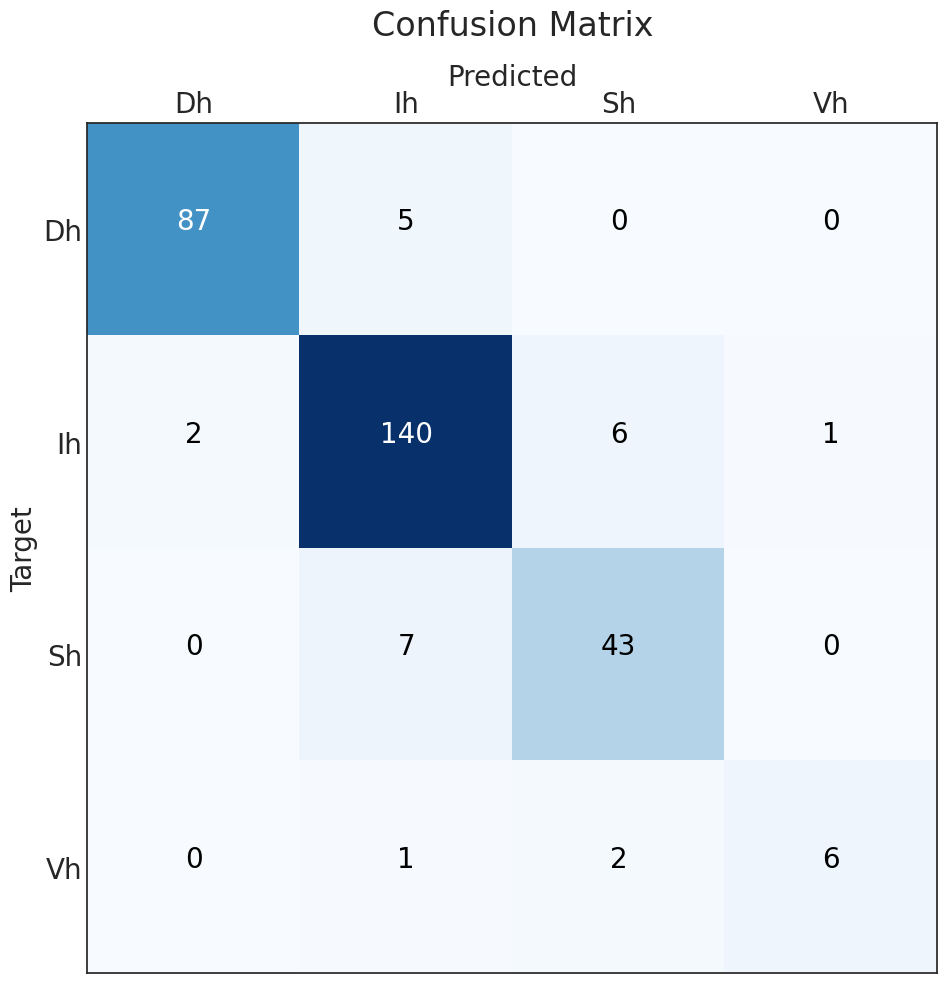

Accuracy: 0.9200
Macro F1 Score: 0.8725
Macro Sensitivity (Recall): 0.8530
Macro Precision: 0.8982
ROC AUC (macro): 0.9302


Generating Integrated Gradients explanations for class: Ih


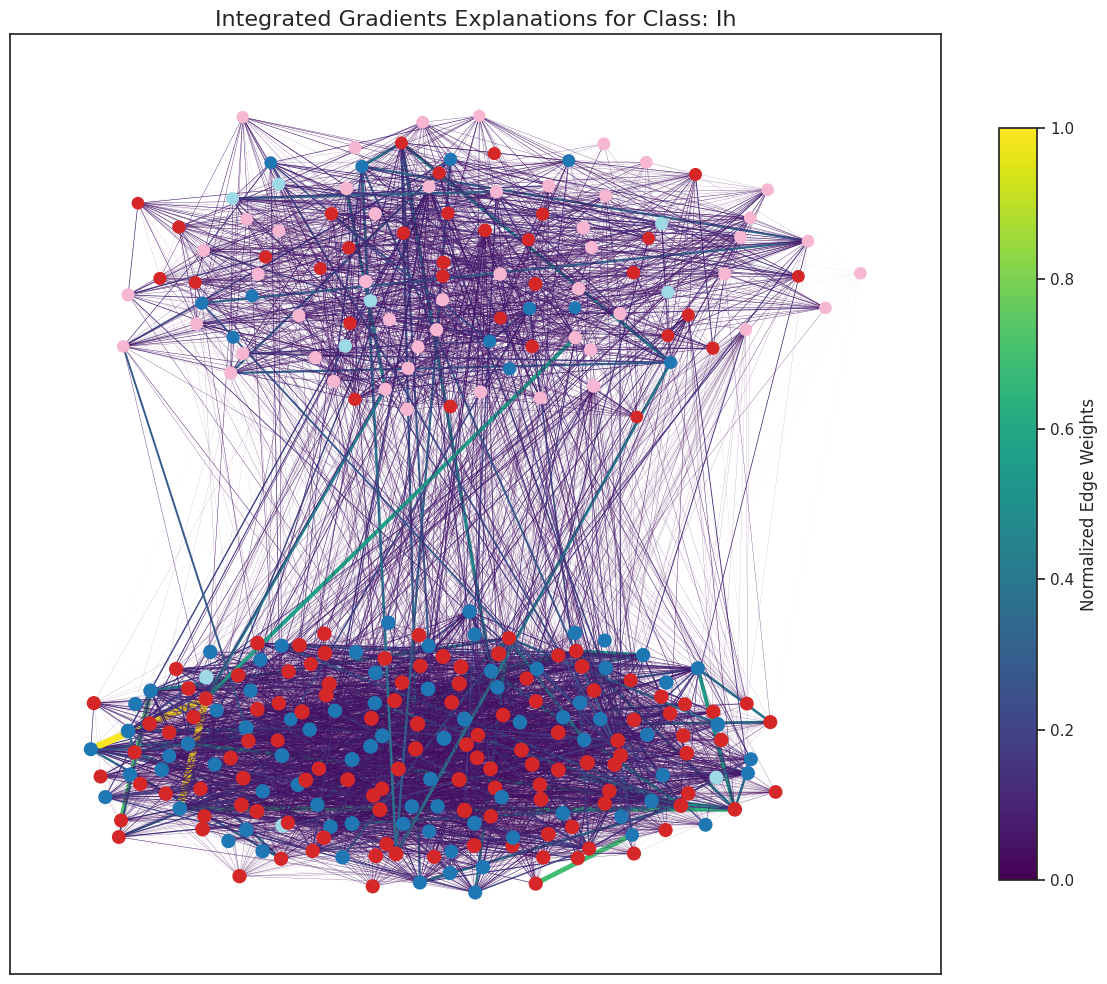

In [86]:
#@title Model Evaluation and Visualization { display-mode: "form" }
#@markdown ## Select what you want to visualize

#@markdown ### Model Performance Visualization
show_confusion_matrix = True #@param {type:"boolean"}
show_classification_report = True #@param {type:"boolean"}

#@markdown ### Captum Model Explanations
perform_captum_explanations = True #@param {type:"boolean"}

#@markdown #### Explanation Method
explanation_method = "Integrated Gradients" #@param ["Integrated Gradients", "Saliency"]

#@markdown #### Target Class to Explain
#@markdown Select which class to explain (0-based index)
target_class = 1 #@param {type:"slider", min:0, max:5, step:1}

#@markdown ### Network Visualization
visualize_network = True #@param {type:"boolean"}
show_edge_weights = True #@param {type:"boolean"}
node_size_factor = 50 #@param {type:"slider", min:10, max:100, step:5}

from sklearn.metrics import (
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    accuracy_score
)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import torch
from captum.attr import Saliency, IntegratedGradients
import matplotlib as mpl
import matplotlib.patches as mpatches
from matplotlib import cm
from collections import defaultdict
from IPython.display import display, HTML
import itertools

# Function to test the model
def test(data):
    model.eval()
    optimizer.zero_grad()  # Clear gradients
    out = model(data.x, data.edge_index)  # Perform a single forward pass
    return out

# Function to plot confusion matrix
def plot_cm(cm, classes):
    sns.set(style='white')
    fig, ax = plt.subplots(figsize=(20, 10))
    plt.imshow(cm, cmap="Blues")
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.tick_params(labelsize=20, length=0)

    ax.set_title('Confusion Matrix', size=24, pad=20)
    ax.set_xlabel('Predicted', size=20)
    ax.set_ylabel('Target', size=20)

    nclasses = len(classes)
    ticks = np.arange(0, nclasses, 1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center", size=20,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.show()

# Function to validate model
def validate_model_multilabel(y_trues, y_preds, label_names=None):
    # Convert raw predictions to class predictions
    y_preds = torch.softmax(y_preds, dim=1)
    predicted_classes = torch.argmax(y_preds, dim=1).cpu().detach().numpy()

    y_trues = y_trues.long().cpu().detach().numpy()
    y_preds = y_preds.cpu().detach().numpy()

    acc = accuracy_score(y_trues, predicted_classes)
    f1 = f1_score(y_trues, predicted_classes, average="macro")
    sensitivity = recall_score(y_trues, predicted_classes, average="macro")
    precision = precision_score(y_trues, predicted_classes, average="macro")
    auc = roc_auc_score(y_trues, y_preds, multi_class="ovr", average="macro")

    if label_names is None:
        label_names = [f"Class {i}" for i in range(np.max(y_trues) + 1)]

    # Show classification report if requested
    if show_classification_report:
        cr = classification_report(y_trues, predicted_classes, target_names=label_names)
        print("Classification Report:")
        print(cr)

    # Show confusion matrix if requested
    if show_confusion_matrix:
        cm = confusion_matrix(y_trues, predicted_classes)
        plot_cm(cm, label_names)

    # Generate summary string
    summary = (
        f"Accuracy: {acc:.4f}\n"
        f"Macro F1 Score: {f1:.4f}\n"
        f"Macro Sensitivity (Recall): {sensitivity:.4f}\n"
        f"Macro Precision: {precision:.4f}\n"
        f"ROC AUC (macro): {auc:.4f}\n"
    )

    print(summary)
    return [acc, f1, sensitivity, precision, auc], summary

# Forward function for Captum explanations
def model_forward(edge_mask, data):
    out = model.forward(data.x, data.edge_index, edge_mask)
    return out

# Function to explain model predictions
def explain(method, data, target=0):
    input_mask = torch.ones(data.edge_index.shape[1]).requires_grad_(True).to(device)

    if method == 'ig' or method == 'Integrated Gradients':
        ig = IntegratedGradients(model_forward)
        mask = ig.attribute(input_mask, target=target,
                            additional_forward_args=(data,),
                            internal_batch_size=data.edge_index.shape[1])
    elif method == 'saliency' or method == 'Saliency':
        saliency = Saliency(model_forward)
        mask = saliency.attribute(input_mask, target=target,
                                  additional_forward_args=(data,))
    else:
        raise Exception('Unknown explanation method')

    edge_mask = np.abs(mask.cpu().detach().numpy())
    if edge_mask.max() > 0:  # avoid division by zero
        edge_mask = edge_mask / edge_mask.max()
    return edge_mask

# Function to aggregate edge directions
def aggregate_edge_directions(edge_mask, data):
    edge_mask_dict = defaultdict(float)
    for val, u, v in list(zip(edge_mask, *data.edge_index)):
        u, v = u.item(), v.item()
        if u > v:
            u, v = v, u
        edge_mask_dict[(u, v)] += val
    return edge_mask_dict

# Function to draw network with explanations
def visualize_network_with_explanations(data, G, edge_mask_dict, title):
    # Normalize weights for visualization
    if edge_mask_dict:
        max_weight = max(edge_mask_dict.values())
        normalized_weights = {edge: weight / max_weight for edge, weight in edge_mask_dict.items()}
    else:
        normalized_weights = {}

    # Create figure
    fig, ax = plt.subplots(figsize=(12, 10))
    plt.title(title, fontsize=16)

    # Use a layout that ensures good separation between nodes
    pos = nx.spring_layout(G, seed=42, k=2/np.sqrt(G.number_of_nodes()))

    # Draw edges with thickness proportional to weights if show_edge_weights is True
    if show_edge_weights and normalized_weights:
        edges, weights = zip(*normalized_weights.items())
        nx.draw_networkx_edges(G, pos,
                              edgelist=edges,
                              width=[5 * w for w in weights],
                              edge_color=weights,
                              edge_cmap=cm.viridis)
    else:
        nx.draw_networkx_edges(G, pos, alpha=0.3)

    # Draw nodes with sizes proportional to their degree
    node_sizes = [node_size_factor + node_size_factor * G.degree(n) / max(dict(G.degree()).values()) for n in G.nodes()]

    # Get node colors from class labels
    node_colors = data.y.cpu().detach().numpy()

    nx.draw_networkx_nodes(G, pos,
                          node_size=node_sizes,
                          node_color=node_colors,
                          cmap=cm.tab20)

    # Add labels to nodes if there aren't too many
    if len(G.nodes()) < 100:
        nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')

    # Add a color bar for edge weights if showing weights
    if show_edge_weights and normalized_weights:
        plt.colorbar(plt.cm.ScalarMappable(cmap=cm.viridis),
                    label="Normalized Edge Weights",
                    shrink=0.8, ax=ax)

    plt.tight_layout()
    plt.show()

# Get data for evaluation
data = datas[simulation_to_train].to(device)
model.to(device)

# Generate predictions
y_pred = test(data)
y_test = data.y

# Get label names
try:
    label_names = list(labels_maps[simulation_to_train].keys())
    print(f"Classes: {label_names}")
except:
    label_names = [f"Class {i}" for i in range(len(torch.unique(y_test)))]
    print(f"Using default class names: {label_names}")

# Evaluate model performance
metrics, _ = validate_model_multilabel(y_test, y_pred, label_names=label_names)

# Perform Captum explanations if requested
if perform_captum_explanations:
    print(f"\nGenerating {explanation_method} explanations for class: {label_names[target_class]}")

    # Check that target class is valid
    if target_class >= len(label_names):
        print(f"Warning: Target class index {target_class} is out of bounds. Using class 0 instead.")
        target_class = 0

    # Get method name in format expected by explain function
    method_name = 'ig' if explanation_method == "Integrated Gradients" else 'saliency'

    # Compute masks and aggregate
    edge_mask = explain(method_name, data, target=target_class)
    edge_mask_dict = aggregate_edge_directions(edge_mask, data)

    # Visualize network with explanations if requested
    if visualize_network:
        try:
            G = sim.G  # Try to get the graph from simulation
        except:
            # Create a networkx graph from the edge_index
            G = nx.Graph()
            edge_index = data.edge_index.cpu().numpy()
            for i in range(edge_index.shape[1]):
                G.add_edge(edge_index[0, i], edge_index[1, i])

        visualize_network_with_explanations(
            data,
            G,
            edge_mask_dict,
            f"{explanation_method} Explanations for Class: {label_names[target_class]}"
        )

# Hide the code
display(HTML('''
<script>
var cell = document.querySelector('.input');
if (cell) cell.style.display = 'none';
</script>
'''))



In [97]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.6f' % x)

#@title Node-level state probabilities { display-mode: "form" }
#@markdown ## Select the node you want to predict probabilities
idx = 29 #@param {type:"slider", min:0, max:100, step:1}

pred = y_pred[idx].cpu().detach().numpy()
df_pred = pd.DataFrame(columns = labels_map)
df_pred.loc[idx] = list(pred)
df_pred.T

,29
Dh,0.000000
Ih,0.999996
Sh,0.000002
Vh,0.000001
